In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
df = pd.read_csv("fuel_consumption_dataset.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [11]:
X = df[["ENGINESIZE"]]
y = df["CO2EMISSIONS"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [15]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test,y_pred)
print(r2)

0.7615595731934373


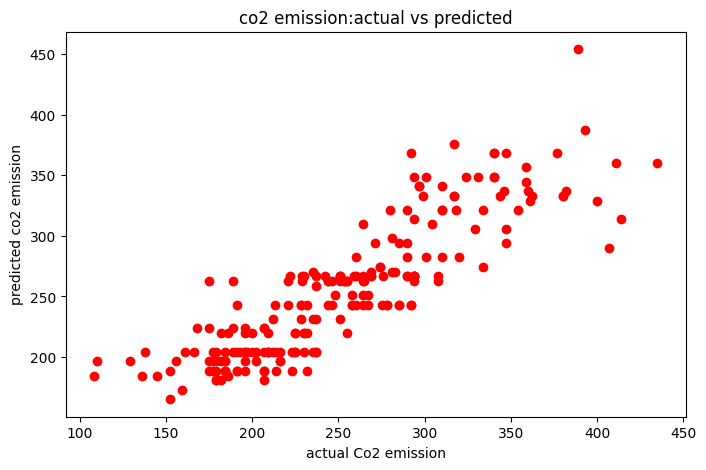

In [17]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred,color="red")
plt.xlabel("actual Co2 emission")
plt.ylabel("predicted co2 emission")
plt.title("co2 emission:actual vs predicted")
plt.show()

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
df = pd.read_csv("used_cars_dataset.csv")
df.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,selling_price
0,Maruti 800 AC,2007,70000,Petrol,Individual,Manual,First Owner,60000
1,Maruti Wagon R LXI Minor,2007,50000,Petrol,Individual,Manual,First Owner,135000
2,Hyundai Verna 1.6 SX,2012,100000,Diesel,Individual,Manual,First Owner,600000
3,Datsun RediGO T Option,2017,46000,Petrol,Individual,Manual,First Owner,250000
4,Honda Amaze VX i-DTEC,2014,141000,Diesel,Individual,Manual,Second Owner,450000


In [19]:
df = df.drop("name",axis=1)
df.head()

,year,km_driven,fuel,seller_type,transmission,owner,selling_price
0,2007,70000,Petrol,Individual,Manual,First Owner,60000
1,2007,50000,Petrol,Individual,Manual,First Owner,135000
2,2012,100000,Diesel,Individual,Manual,First Owner,600000
3,2017,46000,Petrol,Individual,Manual,First Owner,250000
4,2014,141000,Diesel,Individual,Manual,Second Owner,450000


In [20]:
le = LabelEncoder()
categorical_cols = ["fuel", "seller_type", "transmission", "owner"]
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])
    df.head()

In [21]:
X = df.drop("selling_price", axis=1)
y = df["selling_price"]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [24]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)

0.3939008529340028


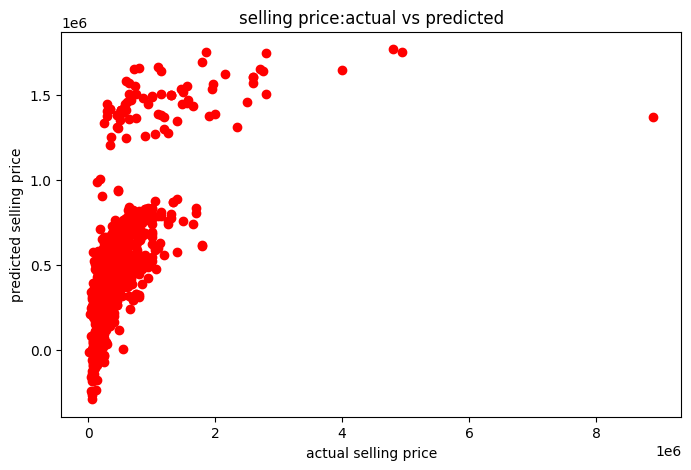

In [28]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color="red")
plt.xlabel("actual selling price")
plt.ylabel("predicted selling price")
plt.title("selling price:actual vs predicted")
plt.show()

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score
df = pd.read_csv("housing_price_dataset.csv")
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [35]:
df = df.drop("Address",axis=1)
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [36]:
X = df.drop("Price",axis=1)
y = df["Price"]


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
lasso = Lasso()
lasso_params = {"alpha":[0.0001, 0.001, 0.01, 0.1, 1, 10]}
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5)
lasso_grid.fit(X_train, y_train)
best_lasso = lasso_grid.best_estimator_
best_lasso

,alpha,10
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [41]:
ridge = Ridge()
ridge_params = {"alpha":[0.0001, 0.001, 0.01, 0.1, 1, 10]}
ridge_grid = GridSearchCV(ridge, ridge_params, cv=5)
ridge_grid.fit(X_train, y_train)
best_ridge = ridge_grid.best_estimator_
best_ridge

,alpha,1
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [42]:
y_pred_lasso = best_lasso.predict(X_test)
r2_lasso = r2_score(y_test, y_pred_lasso)
y_pred_ridge = best_ridge.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(r2_lasso,r2_ridge)

0.9179961853521253 0.9179914220241199


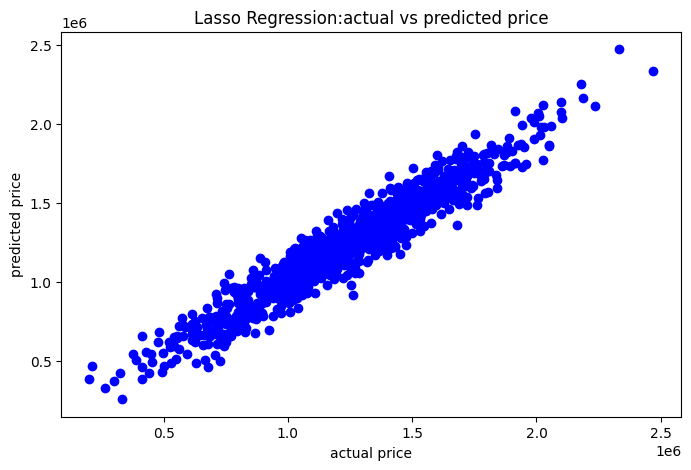

In [43]:
plt.figure(figsize=(8,5))
plt.scatter(y_test,y_pred_lasso,color="blue")
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("Lasso Regression:actual vs predicted price")
plt.show()

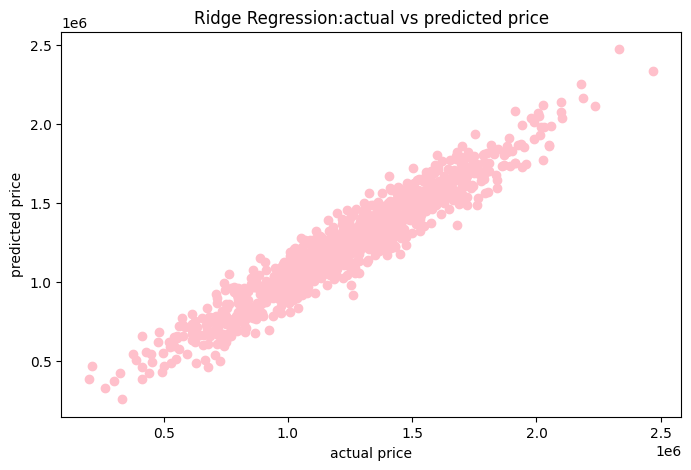

In [44]:
plt.figure(figsize=(8,5))
plt.scatter(y_test,y_pred_ridge,color="pink")
plt.xlabel("actual price")
plt.ylabel("predicted price")
plt.title("Ridge Regression:actual vs predicted price")
plt.show()

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
df = pd.read_csv("salary_data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [50]:
X = df[["YearsExperience"]]
y = df["Salary"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [51]:
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [52]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(r2, mse, mae)

0.9024461774180497 49830096.85590839 6286.453830757749


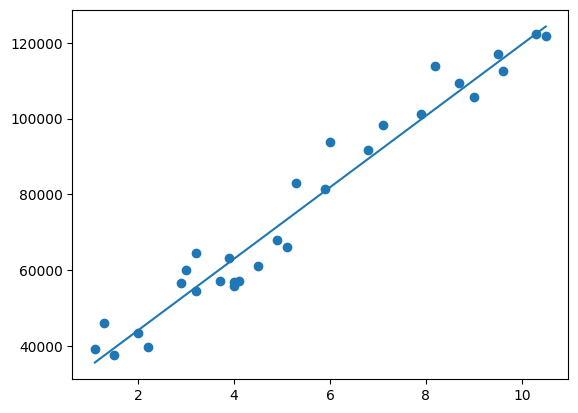

In [53]:
plt.scatter(X, y)
plt.plot(X, model.predict(X))
plt.show()

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
df = pd.read_csv("china_gdp.csv")
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


In [55]:
X = df[["Year"]]
y = df["Value"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [56]:
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

In [58]:
model =LinearRegression()
model.fit(X_poly, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [60]:
y_pred = model.predict(X_poly)
r2 = r2_score(y, y_pred)
print(r2)

0.9651202302209484


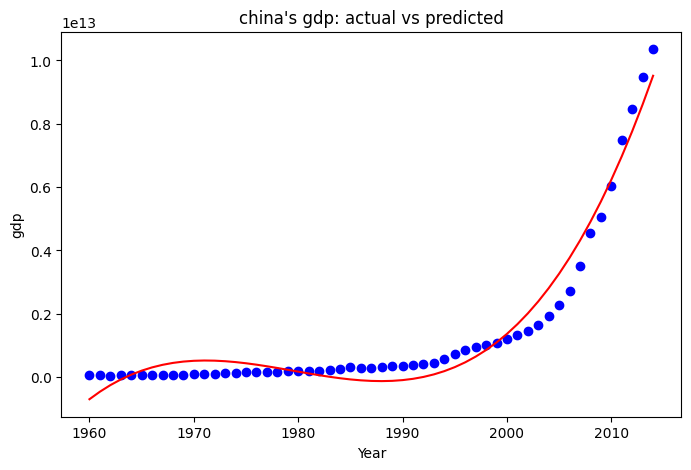

In [61]:
plt.figure(figsize=(8,5))
plt.scatter(X, y, color="blue",label="Actual gdp")
plt.plot(X, y_pred, color="red",label="predicted gdp")
plt.xlabel("Year")
plt.ylabel("gdp")
plt.title("china's gdp: actual vs predicted")
plt.show()

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_curve, f1_score, auc, confusion_matrix
df = pd.read_csv("samples_cancer.csv")
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [68]:
X = df.drop(["ID", "Class"], axis=1)
y = df["Class"]

In [69]:
y = y.map({2: 0, 4: 1})

In [70]:


# Replace '?' with NaN
X = X.replace('?', np.nan)

# Convert all columns to numeric
X = X.apply(pd.to_numeric)

# Drop rows with any NaN
X = X.dropna()
y = y[X.index]  # Keep y aligned

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [73]:
y_pred = model.predict(X)

In [74]:
y_prob = model.predict_proba(X)[:,1]

In [75]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

cm = confusion_matrix(y, y_pred)
print(cm)

[[435   9]
 [ 13 226]]


In [76]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       444
           1       0.96      0.95      0.95       239

    accuracy                           0.97       683
   macro avg       0.97      0.96      0.96       683
weighted avg       0.97      0.97      0.97       683



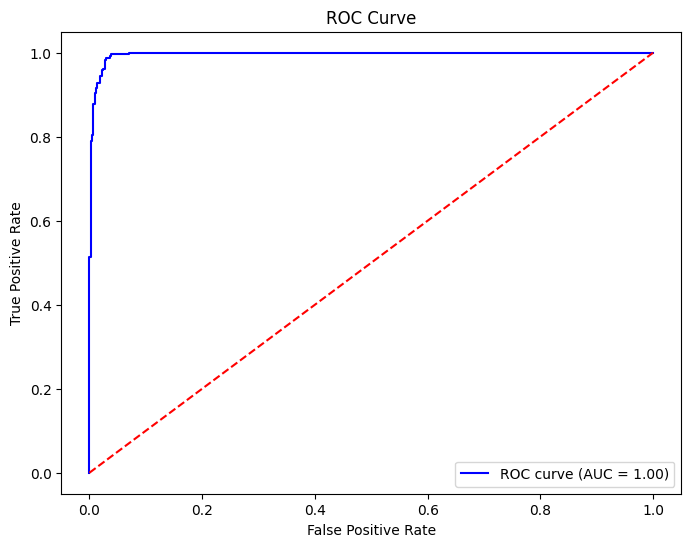

In [77]:
fpr, tpr, thresholds = roc_curve(y, y_prob)
auc = roc_auc_score(y, y_prob)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [78]:
import pandas as pd
from sklearn.model_selection  import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [79]:
data=pd.read_csv('teleCust.csv')
data.head()


,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [80]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


In [81]:
x= data.drop("custcat",axis=1)
y=data['custcat']

In [82]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=42)


In [83]:
model=KNeighborsClassifier()
model.fit(x_train,y_train)


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [84]:
y_pred=model.predict(x_test)


In [85]:
print("Accuracy:", accuracy_score(y_test,y_pred))


Accuracy: 0.33


In [86]:
import pandas as pd

df = pd.read_csv("drug.csv")
df.head()



,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [87]:
X = df.drop("Drug", axis=1)   # all columns except Drug
y = df["Drug"]                # target column


In [88]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in X.columns:
    X[col] = le.fit_transform(X[col])


In [89]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [90]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [91]:
y_pred = model.predict(X_test)
y_pred


array(['drugX', 'drugY', 'drugX', 'drugC', 'drugY', 'drugY', 'drugY',
       'drugX', 'drugA', 'drugX', 'drugA', 'drugX', 'drugY', 'drugA',
       'drugB', 'drugY', 'drugB', 'drugX', 'drugC', 'drugY', 'drugB',
       'drugX', 'drugX', 'drugY', 'drugY', 'drugY', 'drugC', 'drugX',
       'drugY', 'drugX', 'drugY', 'drugC', 'drugC', 'drugY', 'drugA',
       'drugY', 'drugX', 'drugA', 'drugY', 'drugA'], dtype=object)

In [92]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)


Accuracy: 1.0


In [94]:
import pandas as pd

df = pd.read_csv("pima-indians-diabetes.data.csv", header=None)
df.head()


,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [95]:
X = df.iloc[:, :-1]    # all columns except last
y = df.iloc[:, -1]     # last column


In [96]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [97]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)


,priors,None
,var_smoothing,1e-09


In [98]:
y_pred_gnb = gnb.predict(X_test)


In [99]:
from sklearn.metrics import accuracy_score, f1_score

acc_gnb = accuracy_score(y_test, y_pred_gnb)
f1_gnb = f1_score(y_test, y_pred_gnb)

print("GaussianNB Accuracy:", acc_gnb)
print("GaussianNB F1 Score:", f1_gnb)


GaussianNB Accuracy: 0.7662337662337663
GaussianNB F1 Score: 0.6842105263157895


In [100]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(X_train, y_train)


,alpha,1.0
,force_alpha,True
,binarize,0.0
,fit_prior,True
,class_prior,None


In [101]:
y_pred_bnb = bnb.predict(X_test)


In [102]:
acc_bnb = accuracy_score(y_test, y_pred_bnb)
f1_bnb = f1_score(y_test, y_pred_bnb)

print("BernoulliNB Accuracy:", acc_bnb)
print("BernoulliNB F1 Score:", f1_bnb)


BernoulliNB Accuracy: 0.6558441558441559
BernoulliNB F1 Score: 0.1016949152542373


In [103]:
# Cell 1: imports and load dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("samples_cancer.csv")
df.head()


,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [104]:
X = df.drop(["ID", "Class"], axis=1)
y = df["Class"]
X.shape, y.shape

((699, 9), (699,))

In [105]:
y = y.map({2: 0, 4: 1})
y.value_counts()

Class
0    458
1    241
Name: count, dtype: int64

In [106]:
X = X.replace("?", np.nan)
X = X.apply(pd.to_numeric)  # force numeric, invalid -> NaN
mask = X.notnull().all(axis=1)               # rows without any NaN
X = X[mask].reset_index(drop=True)
y = y[mask].reset_index(drop=True)
X.shape, y.shape

((683, 9), (683,))

In [107]:
# Cell 5: split into train and test (80% train, 20% test) with stratify
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((546, 9), (137, 9), (546,), (137,))

In [108]:
# Cell 6: import SVM and evaluation metrics
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score,
    jaccard_score, confusion_matrix, roc_curve, roc_auc_score
)


In [109]:
# Cell 7: create and train models (probability=True for ROC)
models = {
    "Linear": SVC(kernel="linear", probability=True, random_state=42),
    "Polynomial": SVC(kernel="poly", degree=3, probability=True, random_state=42),
    "RBF": SVC(kernel="rbf", probability=True, random_state=42),
    "Sigmoid": SVC(kernel="sigmoid", probability=True, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)

print("All models trained.")


All models trained.


In [110]:
# Cell 8: evaluate models on X_test and collect metrics
results = {}
roc_data = {}  # store fpr,tpr,auc for plotting later

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]   # probability of class 1 (malignant)

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    jaccard = jaccard_score(y_test, y_pred)
    error_rate = 1 - accuracy
    cm = confusion_matrix(y_test, y_pred)

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)

    results[name] = {
        "Accuracy": accuracy,
        "Recall": recall,
        "Precision": precision,
        "F1": f1,
        "Jaccard": jaccard,
        "Error Rate": error_rate,
        "Confusion Matrix": cm,
        "AUC": auc
    }
    roc_data[name] = (fpr, tpr, auc)

results


{'Linear': {'Accuracy': 0.9635036496350365,
  'Recall': 0.9791666666666666,
  'Precision': 0.9215686274509803,
  'F1': 0.9494949494949495,
  'Jaccard': 0.9038461538461539,
  'Error Rate': 0.03649635036496346,
  'Confusion Matrix': array([[85,  4],
         [ 1, 47]]),
  'AUC': 0.9915730337078652},
 'Polynomial': {'Accuracy': 0.9562043795620438,
  'Recall': 0.9583333333333334,
  'Precision': 0.92,
  'F1': 0.9387755102040817,
  'Jaccard': 0.8846153846153846,
  'Error Rate': 0.04379562043795615,
  'Confusion Matrix': array([[85,  4],
         [ 2, 46]]),
  'AUC': 0.9918071161048689},
 'RBF': {'Accuracy': 0.9635036496350365,
  'Recall': 0.9791666666666666,
  'Precision': 0.9215686274509803,
  'F1': 0.9494949494949495,
  'Jaccard': 0.9038461538461539,
  'Error Rate': 0.03649635036496346,
  'Confusion Matrix': array([[85,  4],
         [ 1, 47]]),
  'AUC': 0.9737827715355806},
 'Sigmoid': {'Accuracy': 0.4306569343065693,
  'Recall': 0.0,
  'Precision': 0.0,
  'F1': 0.0,
  'Jaccard': 0.0,
  '

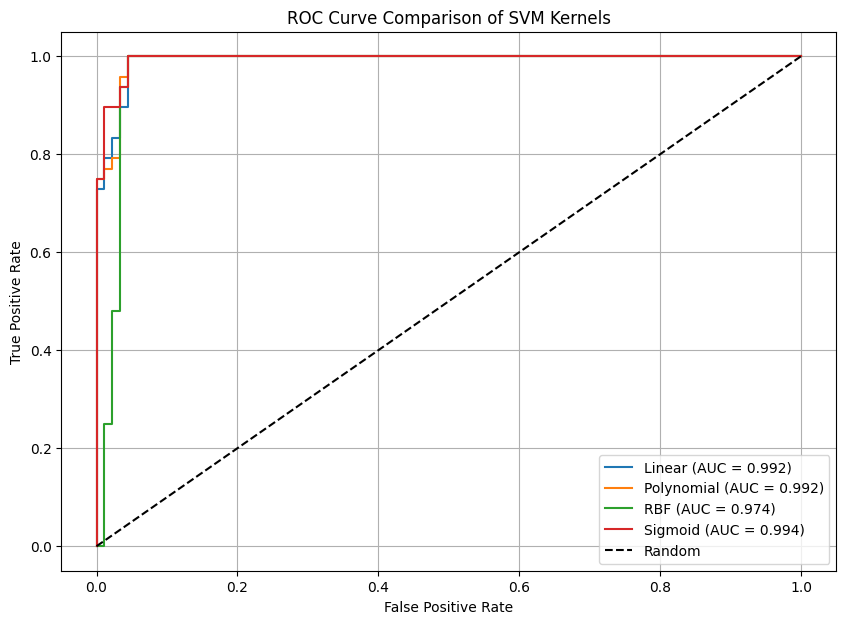

In [111]:
# Cell 10: ROC curve comparison
plt.figure(figsize=(10, 7))

for name, (fpr, tpr, auc) in roc_data.items():
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.3f})")

plt.plot([0, 1], [0, 1], "k--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison of SVM Kernels")
plt.legend()
plt.grid(True)
plt.show()


In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, roc_auc_score
)

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [114]:
columns = ["Pregnancies","Glucose","BloodPressure","SkinThickness",
           "Insulin","BMI","DiabetesPedigree","Age","Outcome"]

df = pd.read_csv("pima-indians-diabetes.data.csv", names=columns)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [115]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [116]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [117]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [118]:
models = {
    "SVM": SVC(kernel='rbf', probability=True),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

for name, model in models.items():
    model.fit(X_train, y_train)

In [119]:
results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec  = recall_score(y_test, y_pred)
    f1   = f1_score(y_test, y_pred)
    auc  = roc_auc_score(y_test, y_prob)

    results[name] = {
        "y_pred": y_pred,
        "y_prob": y_prob,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1": f1,
        "AUC": auc
    }

results

{'SVM': {'y_pred': array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
         0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
         0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
         1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
         0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
         0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
         0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]),
  'y_prob': array([0.75964438, 0.18017291, 0.1997162 , 0.33433768, 0.17613053,
         0.24790459, 0.29325299, 0.75113338, 0.08385975, 0.86878009,
         0.19073006, 0.80570847, 0.12332127, 0.18832179, 0.25063643,
         0.35707313, 0.6641137 , 0.07722965, 0.92359632, 0.24439997,
         0.23609321, 0.61780594, 0.13834745, 0.74346167, 0.45171467,
         0.13376525, 0.6830732 , 0.0946344 , 0.26531463, 0.07484826,
         0.06734775, 0.10961228,

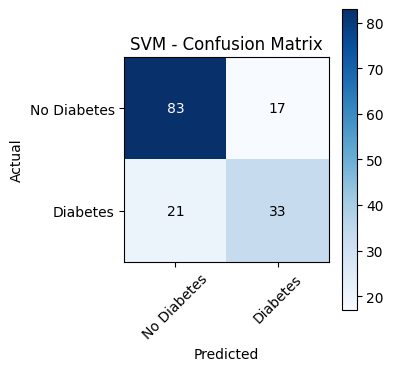

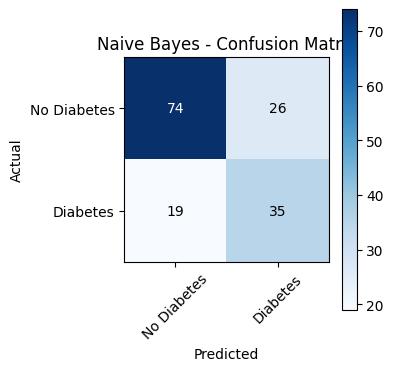

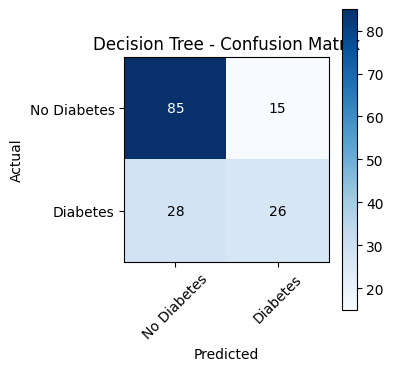

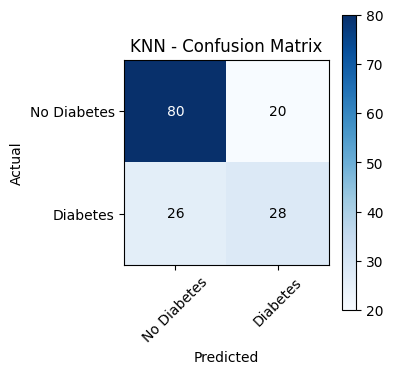

In [120]:
import numpy as np

for name, model in models.items():
    cm = confusion_matrix(y_test, results[name]["y_pred"])

    plt.figure(figsize=(4,4))
    plt.imshow(cm, cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.colorbar()

    classes = ["No Diabetes","Diabetes"]
    ticks = np.arange(len(classes))
    plt.xticks(ticks, classes, rotation=45)
    plt.yticks(ticks, classes)

    for i in range(2):
        for j in range(2):
            plt.text(j, i, cm[i,j], ha='center', va='center',
                     color="white" if cm[i,j] > cm.max()/2 else "black")

    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

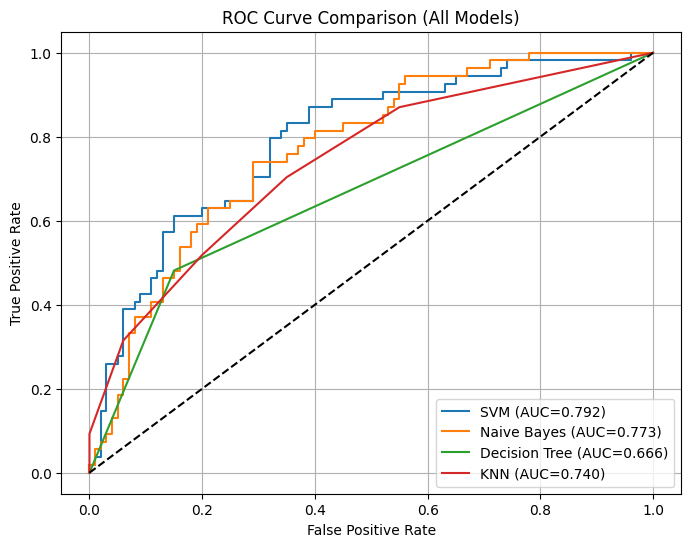

In [121]:
plt.figure(figsize=(8,6))

for name in models.keys():
    y_prob = results[name]["y_prob"]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = results[name]["AUC"]
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.3f})")

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison (All Models)")
plt.legend()
plt.grid(True)
plt.show()